In [4]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns
import shapely

import importlib
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs  # Projections list

import time
import _pickle as pickle

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

In [5]:
#Preliminar parameters:

#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/'

#lat/lon coords to cover the whole SPHERA domain:
lonmin_S=6; lonmax_S=19; latmin_S=35; latmax_S=49
latplot_S=[latmin_S,latmax_S]; lonplot_S=[lonmin_S,lonmax_S]
#maps limits whole SPHERA domain
xlim=lonplot_S
ylim=latplot_S

#Shapefiles with geopandas: NEW VERSION!
sfg_ita = gpd.read_file(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1')
sfg_deu = gpd.read_file(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1')
sfg_aut = gpd.read_file(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1')
sfg_che = gpd.read_file(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1')
sfg_cro = gpd.read_file(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1')
sfg_slo = gpd.read_file(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1')
sfg_hun = gpd.read_file(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1')
sfg_alg = gpd.read_file(fold + "hail4_punge/geodata/algeria/rt767cn2098.shp", encoding='latin-1')
sfg_tun = gpd.read_file(fold + "hail4_punge/geodata/tunisia/TUN_adm0.shp", encoding='latin-1')
sfg_bos = gpd.read_file(fold + "hail4_punge/geodata/bosnia/bt512fj0408.shp", encoding='latin-1')
sfg_fra = gpd.read_file(fold + "hail4_punge/geodata/france/dw125xh0996.shp", encoding='latin-1')
sfg_mon = gpd.read_file(fold + "hail4_punge/geodata/montenegro/MNE_adm0.shp", encoding='latin-1')
sfg_cze = gpd.read_file(fold + "hail4_punge/geodata/czech/CZE_adm0.shp", encoding='latin-1')
sfg_svk = gpd.read_file(fold + "hail4_punge/geodata/slovakia/SVK_adm0.shp", encoding='latin-1')

#lat/lon coords to cover the whole SPHERA domain:
lonmin=6; lonmax=19; latmin=35; latmax=49
latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]

#maps limits whole SPHERA domain
x_lim=lonplot
y_lim=latplot


#shapefile in vector form for considering multiple geographic shapefiles
sf_geo = [sfg_ita, sfg_aut, sfg_deu, sfg_che, sfg_cro, sfg_slo, sfg_hun, sfg_alg, sfg_tun, sfg_fra, sfg_bos,
          sfg_mon, sfg_cze, sfg_svk]

sfg_land = gpd.read_file(fold + "hail4_punge/geodata/Land/ne_10m_land.shp", encoding='latin-1')


#store cities for plotting in maps
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin_S,latmax_S,lonmin_S,lonmax_S)

#read shapefile of SPHERA 10km grid:
sf_sp = gpd.read_file(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1')

hhmin=0
hhmax=23

In [6]:
#SETUP THRESHOLDS FOR SPHERA PROXIES (percentiles of param distributions in presence of ESWD report)

#SET WHEN CONSIDERING TEMP WINDOW = 3H,2-98 perc thresholds
#t_CAPE = 505.32
#t_K = 30.2
#t_LI = -1.27
#t_DLS = 7.4
#t_H0 = 4104.5

#SET WHEN CONSIDERING TEMP WINDOW = 3H,5-95 perc thresholds
t_CAPE = 618.42
t_K = 32.5
t_LI = -2.08
t_DLS = 9.25
t_H0 = 4039

In [7]:
#LIST OF DAYS WITH JULIAN DAY AND DATETIME FORMAT:

#days in 2016: 214 days (actually 211 because the following days are missing: 2016185,2016186,2016201 )
days_2016 = [2016092,2016093,2016094,2016095,2016096,2016097,2016098,2016099,2016100,2016101,2016102,2016103,2016104,
        2016105,2016106,2016107,2016108,2016109,2016110,2016111,2016112,2016113,2016114,2016115,2016116,2016117,
        2016118,2016119,2016120,2016121,2016122,2016123,2016124,2016125,2016126,2016127,2016128,2016129,2016130,
        2016131,2016132,2016133,2016134,2016135,2016136,2016137,2016138,2016139,2016140,2016141,2016142,2016143,
        2016144,2016145,2016146,2016147,2016148,2016149,2016150,2016151,2016152,2016153,2016154,2016155,2016156,
        2016157,2016158,2016159,2016160,2016161,2016162,2016163,2016164,2016165,2016166,2016167,2016168,2016169,
        2016170,2016171,2016172,2016173,2016174,2016175,2016176,2016177,2016178,2016179,2016180,2016181,2016182,
        2016183,2016184,2016185,2016186,2016187,2016188,2016189,2016190,2016191,2016192,2016193,2016194,2016195,
        2016196,2016197,2016198,2016199,2016200,2016201,2016202,2016203,2016204,2016205,2016206,2016207,2016208,
        2016209,2016210,2016211,2016212,2016213,2016214,2016215,2016216,2016217,2016218,2016219,2016220,2016221,
        2016222,2016223,2016224,2016225,2016226,2016227,2016228,2016229,2016230,2016231,2016232,2016233,2016234,
        2016235,2016236,2016237,2016238,2016239,2016240,2016241,2016242,2016243,2016244,2016245,2016246,2016247,
        2016248,2016249,2016250,2016251,2016252,2016253,2016254,2016255,2016256,2016257,2016258,2016259,2016260,
        2016261,2016262,2016263,2016264,2016265,2016266,2016267,2016268,2016269,2016270,2016271,2016272,2016273,
        2016274,2016275,2016276,2016277,2016278,2016279,2016280,2016281,2016282,2016283,2016284,2016285,2016286,
        2016287,2016288,2016289,2016290,2016291,2016292,2016293,2016294,2016295,2016296,2016297,2016298,2016299,
        2016300,2016301,2016302,2016303,2016304,2016305]

#days in 2017: missing 1 april (2017091), 213 days
days_2017 = [2017091,2017092,2017093,2017094,2017095,2017096,2017097,2017098,2017099,2017100,2017101,2017102,2017103,2017104,
        2017105,2017106,2017107,2017108,2017109,2017110,2017111,2017112,2017113,2017114,2017115,2017116,2017117,
        2017118,2017119,2017120,2017121,2017122,2017123,2017124,2017125,2017126,2017127,2017128,2017129,2017130,
        2017131,2017132,2017133,2017134,2017135,2017136,2017137,2017138,2017139,2017140,2017141,2017142,2017143,
        2017144,2017145,2017146,2017147,2017148,2017149,2017150,2017151,2017152,2017153,2017154,2017155,2017156,
        2017157,2017158,2017159,2017160,2017161,2017162,2017163,2017164,2017165,2017166,2017167,2017168,2017169,
        2017170,2017171,2017172,2017173,2017174,2017175,2017176,2017177,2017178,2017179,2017180,2017181,2017182,
        2017183,2017184,2017185,2017186,2017187,2017188,2017189,2017190,2017191,2017192,2017193,2017194,2017195,
        2017196,2017197,2017198,2017199,2017200,2017201,2017202,2017203,2017204,2017205,2017206,2017207,2017208,
        2017209,2017210,2017211,2017212,2017213,2017214,2017215,2017216,2017217,2017218,2017219,2017220,2017221,
        2017222,2017223,2017224,2017225,2017226,2017227,2017228,2017229,2017230,2017231,2017232,2017233,2017234,
        2017235,2017236,2017237,2017238,2017239,2017240,2017241,2017242,2017243,2017244,2017245,2017246,2017247,
        2017248,2017249,2017250,2017251,2017252,2017253,2017254,2017255,2017256,2017257,2017258,2017259,2017260,
        2017261,2017262,2017263,2017264,2017265,2017266,2017267,2017268,2017269,2017270,2017271,2017272,2017273,
        2017274,2017275,2017276,2017277,2017278,2017279,2017280,2017281,2017282,2017283,2017284,2017285,2017286,
        2017287,2017288,2017289,2017290,2017291,2017292,2017293,2017294,2017295,2017296,2017297,2017298,2017299,
        2017300,2017301,2017302,2017303,2017304]

#days in 2018: missing 1 april (2018091) and 17 june (2018168), 212 days
days_2018 = [2018091,2018092,2018093,2018094,2018095,2018096,2018097,2018098,2018099,2018100,2018101,2018102,2018103,2018104,
        2018105,2018106,2018107,2018108,2018109,2018110,2018111,2018112,2018113,2018114,2018115,2018116,2018117,
        2018118,2018119,2018120,2018121,2018122,2018123,2018124,2018125,2018126,2018127,2018128,2018129,2018130,
        2018131,2018132,2018133,2018134,2018135,2018136,2018137,2018138,2018139,2018140,2018141,2018142,2018143,
        2018144,2018145,2018146,2018147,2018148,2018149,2018150,2018151,2018152,2018153,2018154,2018155,2018156,
        2018157,2018158,2018159,2018160,2018161,2018162,2018163,2018164,2018165,2018166,2018167,2018168,2018169,
        2018170,2018171,2018172,2018173,2018174,2018175,2018176,2018177,2018178,2018179,2018180,2018181,2018182,
        2018183,2018184,2018185,2018186,2018187,2018188,2018189,2018190,2018191,2018192,2018193,2018194,2018195,
        2018196,2018197,2018198,2018199,2018200,2018201,2018202,2018203,2018204,2018205,2018206,2018207,2018208,
        2018209,2018210,2018211,2018212,2018213,2018214,2018215,2018216,2018217,2018218,2018219,2018220,2018221,
        2018222,2018223,2018224,2018225,2018226,2018227,2018228,2018229,2018230,2018231,2018232,2018233,2018234,
        2018235,2018236,2018237,2018238,2018239,2018240,2018241,2018242,2018243,2018244,2018245,2018246,2018247,
        2018248,2018249,2018250,2018251,2018252,2018253,2018254,2018255,2018256,2018257,2018258,2018259,2018260,
        2018261,2018262,2018263,2018264,2018265,2018266,2018267,2018268,2018269,2018270,2018271,2018272,2018273,
        2018274,2018275,2018276,2018277,2018278,2018279,2018280,2018281,2018282,2018283,2018284,2018285,2018286,
        2018287,2018288,2018289,2018290,2018291,2018292,2018293,2018294,2018295,2018296,2018297,2018298,2018299,
        2018300,2018301,2018302,2018303,2018304]

In [8]:
#write dataframes storing julian days and datetimes of OT days:

days_2016_df =pd.DataFrame(index=np.arange(0,len(days_2016),1), columns=['day','dtime'])
days_2017_df =pd.DataFrame(index=np.arange(0,len(days_2017),1), columns=['day','dtime'])
days_2018_df =pd.DataFrame(index=np.arange(0,len(days_2018),1), columns=['day','dtime'])

for day,ind in zip(days_2016,np.arange(0,len(days_2016),1)):
    
    dtime = datetime.datetime.strptime('2016-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2016_df.iloc[ind]['day'] = day
    days_2016_df.iloc[ind]['dtime'] = dtime    

for day,ind in zip(days_2017,np.arange(0,len(days_2017),1)):
    
    dtime = datetime.datetime.strptime('2017-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2017_df.iloc[ind]['day'] = day
    days_2017_df.iloc[ind]['dtime'] = dtime    
    
for day,ind in zip(days_2018,np.arange(0,len(days_2018),1)):
    
    dtime = datetime.datetime.strptime('2018-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2018_df.iloc[ind]['day'] = day
    days_2018_df.iloc[ind]['dtime'] = dtime    

days_2016_df.dtime = pd.to_datetime(days_2016_df.dtime)
days_2017_df.dtime = pd.to_datetime(days_2017_df.dtime)
days_2018_df.dtime = pd.to_datetime(days_2018_df.dtime)

#REMOVE MISSING DAYS (after creating dataframes otherwise day and dtime are shifted and wrong!!!)

#-2016: 2016185,2016186,2016201
days_2016_df = days_2016_df[(days_2016_df.day !=2016185) & (days_2016_df.day !=2016186) & 
                            (days_2016_df.day !=2016201)]
#-2017: 2017091 
days_2017_df = days_2017_df[days_2017_df.day != 2017091]

#-2018: 2018091, 2018168
days_2018_df = days_2018_df[(days_2018_df.day != 2018091) & (days_2018_df.day != 2018168)]

In [9]:
d_ind =88
day = days_2017_df['day'][d_ind]
dtime = days_2017_df['dtime'][d_ind]

In [10]:
dtime

Timestamp('2017-06-28 00:00:00')

In [11]:
start_time = time.time()
#OT params:
if dtime.year == 2018:
    otpref='NASALARC_MET11_SEVIRI_OTDETECTION_'     #2018

else:
    otpref='NASALARC_MET10_SEVIRI_OTDETECTION_'     #2016 2017

otdir=fold + f'data/OT_SEVIRI_data_2016-2018/{dtime.year}/{day}/';
othstart = '0000'

#read daily sphera data
df_sp = HF.HF_reanProxies_read(dtime)
df_sp_Dbefore = HF.HF_reanProxies_read(dtime-timedelta(days=1)) 

#dictionary to contain hourly geodataframes of unfiltered and filtered OTs:
dORIG_gdf_OT_daily = dict()
dFILT_gdf_OT_daily = dict()

#for loop for filtering OTs based on SPHERA rean parameters:
"""
FINAL SET OF FILTER CONSIDERED FOR EXTENSION:
-temporal window: 0-3h
-spatial window: 70km
-thresholds: 5-95%
"""

print(d_ind, day, dtime, f'Time: {time.time() - start_time}')

88 2017179 2017-06-28 00:00:00 Time: 2.730924367904663


In [12]:
hh = 14

In [13]:
print(f'hour = {hh}')
#read original OT data:
cpclat, cpclon, otpmax, dtmin, ot_timing, irbmin = HF.HF_OTdata(day,hh,hh+1,otpref,otdir,othstart)
print(f'step1 - read OTs. Time: {time.time() - start_time}')

#condition: if there aren't OTs detected in the current hour (i.e. len(ot_timing=0)) skip to next hour:
#if len(ot_timing) == 0:
    #continue

#convert to geodataframes
gdf_OT = HF.HF_OTdata_2_gdf(cpclat,cpclon,otpmax,ot_timing,dtmin,irbmin)

#if len(gdf_OT) == 0:
    #continue
"""
dORIG_gdf_OT_daily[gdf_OT['time'].iloc[0]] = gdf_OT
print(f'step2 - convert to gdf. Time: {time.time() - start_time}')

#condition to exit loop if there are no OTs detected in the last hour:
if len(gdf_OT) == 0:
    dFILT_gdf_OT_daily[gdf_OT['time'].iloc[0]] = gpd.GeoDataFrame()
    #continue
else:

    #extract SPHERA data aggregated over the last 3 hours before including hhmin
    gdf_sp_3OTh = HF.HF_rean_tAgg_OTh(gdf_OT, df_sp, df_sp_Dbefore, sf_sp)
    print(f'step3 - temporal aggregation of SPHERA data. Time: {time.time() - start_time}')

    #extract the spatial windows around every SPHERA cell containing at least 1 OT detection
    dgdf_sp_3OTh_nn = HF.HF_rean_spatWindowOT(gdf_OT, gdf_sp_3OTh)
    print(f'step4 - spatial neighbourhood of SPHERA data. Time: {time.time() - start_time}')
"""

hour = 14
step1 - read OTs. Time: 3.1424598693847656


"\ndORIG_gdf_OT_daily[gdf_OT['time'].iloc[0]] = gdf_OT\nprint(f'step2 - convert to gdf. Time: {time.time() - start_time}')\n\n#condition to exit loop if there are no OTs detected in the last hour:\nif len(gdf_OT) == 0:\n    dFILT_gdf_OT_daily[gdf_OT['time'].iloc[0]] = gpd.GeoDataFrame()\n    #continue\nelse:\n\n    #extract SPHERA data aggregated over the last 3 hours before including hhmin\n    gdf_sp_3OTh = HF.HF_rean_tAgg_OTh(gdf_OT, df_sp, df_sp_Dbefore, sf_sp)\n    print(f'step3 - temporal aggregation of SPHERA data. Time: {time.time() - start_time}')\n\n    #extract the spatial windows around every SPHERA cell containing at least 1 OT detection\n    dgdf_sp_3OTh_nn = HF.HF_rean_spatWindowOT(gdf_OT, gdf_sp_3OTh)\n    print(f'step4 - spatial neighbourhood of SPHERA data. Time: {time.time() - start_time}')\n"

##### FULL FILTER

In [208]:
#gdf_OT = gdf_OT.head(1)

In [209]:
#Copy of the full initial OT dataset from which to remove occurrences after reanalysis filtering:
FILT_gdf_OT_FULL = gdf_OT
toBeFiltered_FULL = pd.DataFrame()

In [210]:
FILT_gdf_OT_FULL

lon        lat                  time  otpmax  \
xlon xlat                                                       
51   311   17.024000  46.997715  2017-06-28T14:00:00Z    0.51   
52   311   17.021999  46.959999  2017-06-28T14:00:00Z    0.51   
     312   17.058714  46.962002  2017-06-28T14:00:00Z    0.51   
53   296   16.489286  46.923286  2017-06-28T14:00:00Z    0.51   
54   295   16.453571  46.886574  2017-06-28T14:00:00Z    0.51   
...              ...        ...                   ...     ...   
158  106    9.753572  43.196285  2017-06-28T14:00:00Z    0.93   
     107    9.790286  43.201286  2017-06-28T14:00:00Z    0.93   
     110    9.900429  43.208286  2017-06-28T14:00:00Z    0.94   
     111    9.935143  43.209286  2017-06-28T14:00:00Z    0.94   
159  106    9.758572  43.175571  2017-06-28T14:00:00Z    0.87   

                            geometry  
xlon xlat                             
51   311   POINT (17.02400 46.99771)  
52   311   POINT (17.02200 46.96000)  
     312   POINT (17.05871 46.96200)  
53   296   POINT (16.48929 46.92329)  
54   295   POINT (16.45357 46.88657)  
...                              ...  
158  106    POINT (9.75357 43.19629)  
     107    POINT (9.79029 43.20129)  
     110    POINT (9.90043 43.20829)  
     111    POINT (9.93514 43.20929)  
159  106    POINT (9.75857 43.17557)  

[774 rows x 5 columns]

In [211]:
#cycle over every SPHERA cell containing OTs:
for SP_cell in dgdf_sp_3OTh_nn.keys():

    #center cell is the first of the dictionary of its neighbourhood
    sp_center = dgdf_sp_3OTh_nn[SP_cell].loc[[SP_cell],:]['geometry'][SP_cell]

    #subset of OT contained in the cell
    #gdf_OT_inCell = gdf_OT.reset_index(drop=True)[gdf_OT.geometry.reset_index(drop=True).within(sp_center)]
    gdf_OT_inCell = gdf_OT[gdf_OT.geometry.within(sp_center)]

    #select SPHERA spatial neighbourhood of the cell
    gdf_sp_neighbour = dgdf_sp_3OTh_nn[SP_cell]
    
    #print(SP_cell)
    
    if (any(gdf_sp_neighbour['CAPE_MU'] > t_CAPE)
        and any(gdf_sp_neighbour['Kindex'] > t_K) 
        and any(gdf_sp_neighbour['LI'] < t_LI) 
        and any(gdf_sp_neighbour['DLS'] > t_DLS)  
        and any(gdf_sp_neighbour['H0'] < t_H0)):
            
            print(f'{len(gdf_OT_inCell)} OTs kept!')
    else:
        #drop out OTs from FILT_gdf_OT not matching conditions
        print(f'Filtered {len(gdf_OT_inCell)} OTs')

        #condition on legth of FILT_gdf_OT (cause if there is only one value equal to the one to be removed it should
        #be explicitly considered)
        if len(FILT_gdf_OT_FULL) > 1:

            #store OTs to be filtered later
            toBeFiltered_FULL = pd.concat([toBeFiltered_FULL,gdf_OT_inCell])

        #condition if there is only 1 point in the full OT detections set            
        elif (len(FILT_gdf_OT_FULL) == 1 and 
              any(FILT_gdf_OT_FULL.reset_index()[['geometry']] == gdf_OT_inCell.reset_index()[['geometry']])):
            FILT_gdf_OT_FULL = gpd.GeoDataFrame()
            
#filter detected OTs:
if len(toBeFiltered_FULL) != 0:
    FILT_gdf_OT_FULL = FILT_gdf_OT_FULL.drop(FILT_gdf_OT_FULL.loc[toBeFiltered_FULL.index].index)

3 OTs kept!
1 OTs kept!
3 OTs kept!
4 OTs kept!
5 OTs kept!
2 OTs kept!
1 OTs kept!
4 OTs kept!
4 OTs kept!
1 OTs kept!
4 OTs kept!
1 OTs kept!
1 OTs kept!
2 OTs kept!
3 OTs kept!
7 OTs kept!
9 OTs kept!
2 OTs kept!
4 OTs kept!
2 OTs kept!
6 OTs kept!
7 OTs kept!
3 OTs kept!
3 OTs kept!
6 OTs kept!
4 OTs kept!
4 OTs kept!
1 OTs kept!
3 OTs kept!
4 OTs kept!
2 OTs kept!
2 OTs kept!
4 OTs kept!
1 OTs kept!
1 OTs kept!
2 OTs kept!
6 OTs kept!
5 OTs kept!
8 OTs kept!
1 OTs kept!
6 OTs kept!
7 OTs kept!
5 OTs kept!
9 OTs kept!
4 OTs kept!
3 OTs kept!
1 OTs kept!
2 OTs kept!
1 OTs kept!
3 OTs kept!
1 OTs kept!
4 OTs kept!
2 OTs kept!
1 OTs kept!
5 OTs kept!
2 OTs kept!
1 OTs kept!
7 OTs kept!
2 OTs kept!
4 OTs kept!
3 OTs kept!
1 OTs kept!
4 OTs kept!
7 OTs kept!
4 OTs kept!
5 OTs kept!
3 OTs kept!
1 OTs kept!
5 OTs kept!
1 OTs kept!
2 OTs kept!
5 OTs kept!
1 OTs kept!
4 OTs kept!
1 OTs kept!
3 OTs kept!
2 OTs kept!
2 OTs kept!
2 OTs kept!
1 OTs kept!
6 OTs kept!
1 OTs kept!
3 OTs kept!
4 OT

In [212]:
len(toBeFiltered_FULL)

0

In [213]:
len(FILT_gdf_OT_FULL)

774

In [214]:
len(FILT_gdf_OT_FULL)+len(toBeFiltered_FULL)

774

In [215]:
len(gdf_OT)

774

##### SINGLE PARAM FILTER

In [240]:
param = 'CAPE_MU'

In [241]:
#Copy of the full initial OT dataset from which to remove occurrences after reanalysis filtering:
FILT_gdf_OT_SINGLE = gdf_OT
toBeFiltered_SINGLE = pd.DataFrame()

if param == 'CAPE_MU':
    thresh = t_CAPE
    print('Only CAPE_MU filter!')
elif param == 'Kindex':
    thresh = t_K
    print('Only K filter!')
elif param == 'LI':
    thresh = t_LI
    print('Only LI filter!')
elif param == 'DLS':
    thresh = t_DLS
    print('Only DLS filter!')
elif param == 'H0':
    thresh = t_H0
    print('Only H0 filter!')

Only CAPE_MU filter!


In [242]:
#cycle over every SPHERA cell containing OTs:
for SP_cell in dgdf_sp_3OTh_nn.keys():

    #center cell is the first of the dictionary of its neighbourhood
    sp_center = dgdf_sp_3OTh_nn[SP_cell].loc[[SP_cell],:]['geometry'][SP_cell]

    #subset of OT contained in the cell
    #gdf_OT_inCell = gdf_OT.reset_index(drop=True)[gdf_OT.geometry.reset_index(drop=True).within(sp_center)]
    gdf_OT_inCell = gdf_OT[gdf_OT.geometry.within(sp_center)]

    #select SPHERA spatial neighbourhood of the cell
    gdf_sp_neighbour = dgdf_sp_3OTh_nn[SP_cell]

    #CONDITIONS ON REANALYSIS DATASET:
    #all conditions refers to the requirement that at least one of the 49 sphera grid cells must fullfil
    #(separately for each parameter) and they must be all valid in the same time!

    #print(SP_cell)
    
    if ((param == 'CAPE_MU') or (param == 'Kindex') or (param == 'DLS')) and any(gdf_sp_neighbour[param] > thresh):
    
        print(f'{len(gdf_OT_inCell)} OTs kept!')

    elif ((param == 'H0') or (param == 'LI')) and any(gdf_sp_neighbour[param] < thresh):

        print(f'{len(gdf_OT_inCell)} OTs kept!')
        
    else:
        #drop out OTs from FILT_gdf_OT not matching conditions
        print(f'Filtered {len(gdf_OT_inCell)} OTs')

        #condition on legth of FILT_gdf_OT (cause if there is only one value equal to the one to be removed it should
        #be explicitly considered)
        if len(FILT_gdf_OT_SINGLE) > 1:

            #store OTs to be filtered later
            toBeFiltered_SINGLE = pd.concat([toBeFiltered_SINGLE,gdf_OT_inCell])

            #FILT_gdf_OT = FILT_gdf_OT.drop(FILT_gdf_OT.loc[gdf_OT_inCell.index].index)
            #FILT_gdf_OT = FILT_gdf_OT.drop(FILT_gdf_OT[FILT_gdf_OT.geometry.isin(OT_point)].index)
            #FILT_gdf_OT = FILT_gdf_OT.drop(FILT_gdf_OT[FILT_gdf_OT.geometry.isin(gpd.GeoSeries(geometry.Point(OT_point_x, OT_point_y)))].index)
            #FILT_gdf_OT = FILT_gdf_OT.drop(FILT_gdf_OT[FILT_gdf_OT.geometry.isin(gdf_OT_inCell.geometry)].index)

        #condition if there is only 1 point in the full OT detections set            
        elif (len(FILT_gdf_OT_SINGLE) == 1 and 
              any(FILT_gdf_OT_SINGLE.reset_index()[['geometry']] == gdf_OT_inCell.reset_index()[['geometry']])):
            FILT_gdf_OT_SINGLE = gpd.GeoDataFrame()
            
#filter detected OTs:
if len(toBeFiltered_SINGLE) != 0:
    FILT_gdf_OT_SINGLE = FILT_gdf_OT_SINGLE.drop(FILT_gdf_OT_SINGLE.loc[toBeFiltered_SINGLE.index].index)

3 OTs kept!
1 OTs kept!
3 OTs kept!
4 OTs kept!
5 OTs kept!
2 OTs kept!
1 OTs kept!
4 OTs kept!
4 OTs kept!
1 OTs kept!
4 OTs kept!
1 OTs kept!
1 OTs kept!
2 OTs kept!
3 OTs kept!
7 OTs kept!
9 OTs kept!
2 OTs kept!
4 OTs kept!
2 OTs kept!
6 OTs kept!
7 OTs kept!
3 OTs kept!
3 OTs kept!
6 OTs kept!
4 OTs kept!
4 OTs kept!
1 OTs kept!
3 OTs kept!
4 OTs kept!
2 OTs kept!
2 OTs kept!
4 OTs kept!
1 OTs kept!
1 OTs kept!
2 OTs kept!
6 OTs kept!
5 OTs kept!
8 OTs kept!
1 OTs kept!
6 OTs kept!
7 OTs kept!
5 OTs kept!
9 OTs kept!
4 OTs kept!
3 OTs kept!
1 OTs kept!
2 OTs kept!
1 OTs kept!
3 OTs kept!
1 OTs kept!
4 OTs kept!
2 OTs kept!
1 OTs kept!
5 OTs kept!
2 OTs kept!
1 OTs kept!
7 OTs kept!
2 OTs kept!
4 OTs kept!
3 OTs kept!
1 OTs kept!
4 OTs kept!
7 OTs kept!
4 OTs kept!
5 OTs kept!
3 OTs kept!
1 OTs kept!
5 OTs kept!
1 OTs kept!
2 OTs kept!
5 OTs kept!
1 OTs kept!
4 OTs kept!
1 OTs kept!
3 OTs kept!
2 OTs kept!
2 OTs kept!
2 OTs kept!
1 OTs kept!
6 OTs kept!
1 OTs kept!
3 OTs kept!
4 OT

In [243]:
len(toBeFiltered_SINGLE)

0

In [244]:
len(FILT_gdf_OT_SINGLE)

774

In [245]:
len(toBeFiltered_SINGLE)+len(FILT_gdf_OT_SINGLE)

774

In [89]:
(any(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) == True) and (any(gdf_sp_neighbour['Kindex'] > t_K) == True) 

False

In [92]:
(any(gdf_sp_neighbour['H0'] < t_H0) == True)

True

In [86]:
t_K

32.5

In [94]:
((any(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) == True)
and (any(gdf_sp_neighbour['Kindex'] > t_K) == True) 
and (any(gdf_sp_neighbour['LI'] < t_LI) == True) 
and (any(gdf_sp_neighbour['DLS'] > t_DLS) == True) 
and (any(gdf_sp_neighbour['H0'] < t_H0) == True))

False

In [103]:
len(gdf_sp_neighbour[(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) & (gdf_sp_neighbour['LI'] < t_LI) 
                 & (gdf_sp_neighbour['DLS'] > t_DLS) & (gdf_sp_neighbour['H0'] < t_H0) 
                 & (gdf_sp_neighbour['Kindex'] > t_K)])

0

In [104]:
(len(gdf_sp_neighbour[(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) & (gdf_sp_neighbour['LI'] < t_LI) 
                 & (gdf_sp_neighbour['DLS'] > t_DLS) & (gdf_sp_neighbour['H0'] < t_H0) 
                 & (gdf_sp_neighbour['Kindex'] > t_K)]) != 0)

False

# TRY NEW METHOD:

new if condition based on the length of the gdf subset of SPHERA satisfying the condition. If length of the subset == 0 (i.e. no hail conditions met) OT is filtered

**THIS METHOD IS NOT GOOD!!** I dont need to find the cell in the neighbourhood in which all 5 conditions are met simultaneously (much more stringent condition!) but I need to find if all 5 conditions are met within at least one of the 49 cells in the neighbourhood not necessarily for the same coincident cell when considering different parameters!

In [113]:
#Copy of the full initial OT dataset from which to remove occurrences after reanalysis filtering:
FILT_gdf_OT_FULL_NEW = gdf_OT
toBeFiltered_FULL_NEW = pd.DataFrame()

In [114]:
#cycle over every SPHERA cell containing OTs:
for SP_cell in dgdf_sp_3OTh_nn.keys():

    #center cell is the first of the dictionary of its neighbourhood
    sp_center = dgdf_sp_3OTh_nn[SP_cell].loc[[SP_cell],:]['geometry'][SP_cell]

    #subset of OT contained in the cell
    #gdf_OT_inCell = gdf_OT.reset_index(drop=True)[gdf_OT.geometry.reset_index(drop=True).within(sp_center)]
    gdf_OT_inCell = gdf_OT[gdf_OT.geometry.within(sp_center)]

    #select SPHERA spatial neighbourhood of the cell
    gdf_sp_neighbour = dgdf_sp_3OTh_nn[SP_cell]
    
    #NEW CONDITION on the length of SPHERA subset satisfying filtering conditions:
    if (len(gdf_sp_neighbour[(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) & (gdf_sp_neighbour['LI'] < t_LI) 
                             & (gdf_sp_neighbour['DLS'] > t_DLS) & (gdf_sp_neighbour['H0'] < t_H0) 
                             & (gdf_sp_neighbour['Kindex'] > t_K)]) != 0):
            
            print(f'{len(gdf_OT_inCell)} OTs kept!')
    else:
        #drop out OTs from FILT_gdf_OT not matching conditions
        print(f'Filtered {len(gdf_OT_inCell)} OTs')

        #condition on legth of FILT_gdf_OT (cause if there is only one value equal to the one to be removed it should
        #be explicitly considered)
        if len(FILT_gdf_OT_FULL_NEW) > 1:

            #store OTs to be filtered later
            toBeFiltered_FULL_NEW = pd.concat([toBeFiltered_FULL_NEW,gdf_OT_inCell])

        #condition if there is only 1 point in the full OT detections set            
        elif (len(FILT_gdf_OT_FULL_NEW) == 1 and 
              any(FILT_gdf_OT_FULL_NEW.reset_index()[['geometry']] == gdf_OT_inCell.reset_index()[['geometry']])):
            FILT_gdf_OT_FULL_NEW = gpd.GeoDataFrame()
            
#filter detected OTs:
if len(toBeFiltered_FULL_NEW) != 0:
    FILT_gdf_OT_FULL_NEW = FILT_gdf_OT_FULL_NEW.drop(FILT_gdf_OT_FULL_NEW.loc[toBeFiltered_FULL_NEW.index].index)

Filtered 4 OTs
4 OTs kept!
Filtered 1 OTs
Filtered 2 OTs
Filtered 2 OTs
Filtered 6 OTs
Filtered 8 OTs
Filtered 3 OTs
Filtered 5 OTs
Filtered 3 OTs
Filtered 1 OTs
Filtered 1 OTs
Filtered 2 OTs
Filtered 6 OTs
Filtered 7 OTs
Filtered 4 OTs
Filtered 6 OTs
4 OTs kept!
Filtered 1 OTs
1 OTs kept!
Filtered 3 OTs
Filtered 6 OTs
Filtered 2 OTs
3 OTs kept!
1 OTs kept!
3 OTs kept!
Filtered 5 OTs
3 OTs kept!
1 OTs kept!
Filtered 2 OTs
Filtered 2 OTs
Filtered 1 OTs
Filtered 3 OTs
Filtered 3 OTs
Filtered 8 OTs
Filtered 1 OTs
Filtered 1 OTs
Filtered 6 OTs
Filtered 2 OTs
4 OTs kept!
5 OTs kept!
5 OTs kept!
1 OTs kept!
7 OTs kept!
8 OTs kept!
2 OTs kept!
6 OTs kept!
8 OTs kept!
7 OTs kept!
7 OTs kept!
3 OTs kept!
1 OTs kept!
2 OTs kept!
2 OTs kept!
5 OTs kept!
1 OTs kept!
2 OTs kept!
2 OTs kept!
3 OTs kept!
1 OTs kept!
3 OTs kept!
4 OTs kept!
1 OTs kept!
3 OTs kept!
3 OTs kept!
6 OTs kept!
3 OTs kept!
6 OTs kept!
1 OTs kept!
5 OTs kept!
5 OTs kept!
1 OTs kept!
5 OTs kept!
6 OTs kept!
4 OTs kept!
6 OTs k

In [115]:
len(toBeFiltered_FULL_NEW)

197

In [116]:
len(FILT_gdf_OT_FULL_NEW)

891

In [117]:
len(FILT_gdf_OT_FULL_NEW)+len(toBeFiltered_FULL_NEW)

1088

In [118]:
FILT_gdf_OT_FULL

lon        lat                  time  otpmax  \
xlon xlat                                                       
68   168   11.949858  46.397575  2018-10-29T16:00:00Z    0.87   
     169   11.985572  46.399574  2018-10-29T16:00:00Z    0.87   
69   168   11.950857  46.364857  2018-10-29T16:00:00Z    0.87   
     169   11.986571  46.363857  2018-10-29T16:00:00Z    0.87   
92   150   11.314000  45.548431  2018-10-29T16:00:00Z    0.58   
...              ...        ...                   ...     ...   
277  253   14.984571  38.966286  2018-10-29T16:00:00Z    0.82   
279  246   14.737571  38.898857  2018-10-29T16:00:00Z    0.54   
     247   14.775286  38.900856  2018-10-29T16:00:00Z    0.54   
280  246   14.738571  38.864143  2018-10-29T16:00:00Z    0.54   
     247   14.775286  38.866142  2018-10-29T16:00:00Z    0.54   

                            geometry  
xlon xlat                             
68   168   POINT (11.94986 46.39758)  
     169   POINT (11.98557 46.39957)  
69   168   POINT (11.95086 46.36486)  
     169   POINT (11.98657 46.36386)  
92   150   POINT (11.31400 45.54843)  
...                              ...  
277  253   POINT (14.98457 38.96629)  
279  246   POINT (14.73757 38.89886)  
     247   POINT (14.77529 38.90086)  
280  246   POINT (14.73857 38.86414)  
     247   POINT (14.77529 38.86614)  

[891 rows x 5 columns]

In [125]:
toBeFiltered_FULL

lon        lat                  time  otpmax  \
xlon xlat                                                       
67   167   11.916143  46.437283  2018-10-29T16:00:00Z    0.87   
     168   11.950857  46.435284  2018-10-29T16:00:00Z    0.87   
     169   11.986571  46.436283  2018-10-29T16:00:00Z    0.87   
68   167   11.915143  46.400574  2018-10-29T16:00:00Z    0.87   
     170   12.022285  46.400574  2018-10-29T16:00:00Z    0.87   
...              ...        ...                   ...     ...   
219  252   14.943856  41.026714  2018-10-29T16:00:00Z    0.69   
     253   14.979571  41.027714  2018-10-29T16:00:00Z    0.69   
283  0      6.000857  38.800999  2018-10-29T16:00:00Z    0.74   
     1      6.036572  38.799999  2018-10-29T16:00:00Z    0.74   
     2      6.072286  38.799000  2018-10-29T16:00:00Z    0.74   

                            geometry  
xlon xlat                             
67   167   POINT (11.91614 46.43728)  
     168   POINT (11.95086 46.43528)  
     169   POINT (11.98657 46.43628)  
68   167   POINT (11.91514 46.40057)  
     170   POINT (12.02229 46.40057)  
...                              ...  
219  252   POINT (14.94386 41.02671)  
     253   POINT (14.97957 41.02771)  
283  0      POINT (6.00086 38.80100)  
     1      POINT (6.03657 38.80000)  
     2      POINT (6.07229 38.79900)  

[191 rows x 5 columns]

In [126]:
toBeFiltered_FULL_NEW

lon        lat                  time  otpmax  \
xlon xlat                                                       
67   167   11.916143  46.437283  2018-10-29T16:00:00Z    0.87   
     168   11.950857  46.435284  2018-10-29T16:00:00Z    0.87   
     169   11.986571  46.436283  2018-10-29T16:00:00Z    0.87   
68   167   11.915143  46.400574  2018-10-29T16:00:00Z    0.87   
     170   12.022285  46.400574  2018-10-29T16:00:00Z    0.87   
...              ...        ...                   ...     ...   
219  252   14.943856  41.026714  2018-10-29T16:00:00Z    0.69   
     253   14.979571  41.027714  2018-10-29T16:00:00Z    0.69   
283  0      6.000857  38.800999  2018-10-29T16:00:00Z    0.74   
     1      6.036572  38.799999  2018-10-29T16:00:00Z    0.74   
     2      6.072286  38.799000  2018-10-29T16:00:00Z    0.74   

                            geometry  
xlon xlat                             
67   167   POINT (11.91614 46.43728)  
     168   POINT (11.95086 46.43528)  
     169   POINT (11.98657 46.43628)  
68   167   POINT (11.91514 46.40057)  
     170   POINT (12.02229 46.40057)  
...                              ...  
219  252   POINT (14.94386 41.02671)  
     253   POINT (14.97957 41.02771)  
283  0      POINT (6.00086 38.80100)  
     1      POINT (6.03657 38.80000)  
     2      POINT (6.07229 38.79900)  

[197 rows x 5 columns]

In [127]:
NOTFOUND_toBeFiltered_FULL = toBeFiltered_FULL_NEW.merge(toBeFiltered_FULL, how='left', indicator=True)
NOTFOUND_toBeFiltered_FULL = NOTFOUND_toBeFiltered_FULL[NOTFOUND_toBeFiltered_FULL['_merge']=='left_only'].drop(columns=['_merge'])
NOTFOUND_toBeFiltered_FULL

,lon,lat,time,otpmax,geometry
186,15.123428,41.065430,2018-10-29T16:00:00Z,0.55,POINT (15.12343 41.06543)
187,15.158143,41.064430,2018-10-29T16:00:00Z,0.55,POINT (15.15814 41.06443)
188,15.193856,41.064430,2018-10-29T16:00:00Z,0.55,POINT (15.19386 41.06443)
189,15.192857,41.026714,2018-10-29T16:00:00Z,0.63,POINT (15.19286 41.02671)
190,15.229571,41.064430,2018-10-29T16:00:00Z,0.55,POINT (15.22957 41.06443)
191,15.228572,41.026714,2018-10-29T16:00:00Z,0.63,POINT (15.22857 41.02671)


No handles with labels found to put in legend.


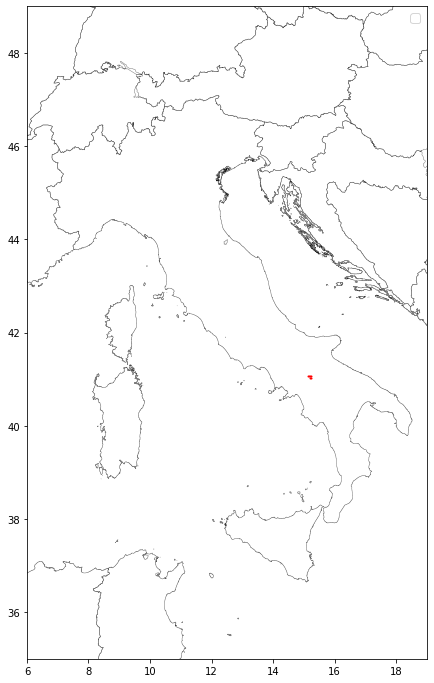

In [130]:
fig, ax = plt.subplots(figsize = (20,12))

plt.ylim(y_lim) #y_lim
plt.xlim(x_lim)  #x_lim

#OTs HITTING:
NOTFOUND_toBeFiltered_FULL.plot(ax=ax, markersize=1, column='otpmax', color='red', zorder=2)   

#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=3)

plt.legend(loc='best', fontsize=13)

In [132]:
dgdf_sp_3OTh_nn_NOTFOUND = HF.HF_rean_spatWindowOT(NOTFOUND_toBeFiltered_FULL, gdf_sp_3OTh)


In [134]:
dgdf_sp_3OTh_nn_NOTFOUND.keys()

dict_keys([7891, 7892])

In [135]:
dgdf_sp_3OTh_nn_NOTFOUND[7891]

,datetime_agg,box_id,%VV700,Kindex,LI,DLS,H0,CAPE_MU,CAPE_ML,geometry
7892,2018-10-29 16:00:00,7892,64.705879,36.418629,1.138322,28.268293,3441.75000,227.099258,17.573530,"POLYGON ((15.20000 41.00000, 15.20000 41.10000..."
8022,2018-10-29 16:00:00,8022,100.000000,35.699287,-0.079893,28.763870,3428.88135,150.550003,10.465625,"POLYGON ((15.20000 41.10000, 15.20000 41.20000..."
8021,2018-10-29 16:00:00,8021,88.235291,37.709061,-0.048891,27.176771,3452.15430,342.988983,18.397058,"POLYGON ((15.10000 41.10000, 15.10000 41.20000..."
8020,2018-10-29 16:00:00,8020,100.000000,38.872757,-0.172235,30.203697,3431.12500,494.940979,54.000000,"POLYGON ((15.00000 41.10000, 15.00000 41.20000..."
7891,2018-10-29 16:00:00,7891,100.000000,38.016941,0.597827,31.413860,3423.19727,276.013153,34.394737,"POLYGON ((15.10000 41.00000, 15.10000 41.10000..."
7890,2018-10-29 16:00:00,7890,100.000000,37.316319,-0.087217,33.808704,3423.56885,334.478119,43.746876,"POLYGON ((15.00000 41.00000, 15.00000 41.10000..."
7762,2018-10-29 16:00:00,7762,90.000000,35.201408,-0.328770,32.672951,3431.25000,169.993744,31.424999,"POLYGON ((15.20000 40.90000, 15.20000 41.00000..."
7761,2018-10-29 16:00:00,7761,100.000000,35.016293,-0.866441,32.632317,3514.54370,133.209381,51.009377,"POLYGON ((15.10000 40.90000, 15.10000 41.00000..."
7760,2018-10-29 16:00:00,7760,90.000000,34.943623,0.026138,32.234569,3553.88135,119.790627,28.493750,"POLYGON ((15.00000 40.90000, 15.00000 41.00000..."
8019,2018-10-29 16:00:00,8019,100.000000,37.794212,-0.015928,36.530937,3396.73755,509.265625,31.384375,"POLYGON ((14.90000 41.10000, 14.90000 41.20000..."


In [143]:
dgdf_sp_3OTh_nn_NOTFOUND[7891][(dgdf_sp_3OTh_nn_NOTFOUND[7891]['CAPE_MU'] > t_CAPE) 
                               & (dgdf_sp_3OTh_nn_NOTFOUND[7891]['DLS'] > t_DLS) 
                               & (dgdf_sp_3OTh_nn_NOTFOUND[7891]['H0'] < t_H0)
                              & (dgdf_sp_3OTh_nn_NOTFOUND[7891]['Kindex'] > t_K)
                             ]

,datetime_agg,box_id,%VV700,Kindex,LI,DLS,H0,CAPE_MU,CAPE_ML,geometry
8284,2018-10-29 16:00:00,8284,90.0,35.064289,-2.078135,28.883432,3482.0625,744.715637,549.153137,"POLYGON ((15.40000 41.30000, 15.40000 41.40000..."
7498,2018-10-29 16:00:00,7498,75.0,39.335991,-1.220518,32.169922,3396.3999,628.690613,285.137512,"POLYGON ((14.80000 40.70000, 14.80000 40.80000..."


In [142]:
t_LI

-2.08

In [ ]:
(len(gdf_sp_neighbour[(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) & (gdf_sp_neighbour['LI'] < t_LI) 
                             & (gdf_sp_neighbour['DLS'] > t_DLS) & (gdf_sp_neighbour['H0'] < t_H0) 
                             & (gdf_sp_neighbour['Kindex'] > t_K)]) != 0)

In [ ]:
((any(gdf_sp_neighbour['CAPE_MU'] > t_CAPE) == True)
        and (any(gdf_sp_neighbour['Kindex'] > t_K) == True) 
        and (any(gdf_sp_neighbour['LI'] < t_LI) == True) 
        and (any(gdf_sp_neighbour['DLS'] > t_DLS) == True) 
        and (any(gdf_sp_neighbour['H0'] < t_H0) == True))

In [149]:
((any(dgdf_sp_3OTh_nn_NOTFOUND[7891]['CAPE_MU'] > t_CAPE) == True)
 and (any(dgdf_sp_3OTh_nn_NOTFOUND[7891]['Kindex'] > t_K) == True) 
 and (any(dgdf_sp_3OTh_nn_NOTFOUND[7891]['LI'] < t_LI) == True) )

True

In [151]:
dgdf_sp_3OTh_nn_NOTFOUND[7891]['LI']  < t_LI

7892    False
8022    False
8021    False
8020    False
7891    False
7890    False
7762    False
7761    False
7760    False
8019    False
7759    False
7889    False
7632    False
7631    False
7893    False
7763    False
8023    False
7630    False
8150    False
8151    False
8152    False
7629    False
8149    False
7633    False
8153    False
8281    False
8282    False
8280    False
7888    False
8018    False
7758    False
7764     True
7894    False
8024    False
7500    False
7501    False
7502    False
8279    False
8283    False
8148    False
7628    False
7634    False
8154    False
7499    False
7503    False
8278    False
8284    False
7498    False
7504    False
Name: LI, dtype: bool

In [152]:
dgdf_sp_3OTh_nn_NOTFOUND[7891]['LI']

7892    1.138322
8022   -0.079893
8021   -0.048891
8020   -0.172235
7891    0.597827
7890   -0.087217
7762   -0.328770
7761   -0.866441
7760    0.026138
8019   -0.015928
7759    0.436030
7889   -0.067149
7632    1.065664
7631    0.604561
7893    0.421059
7763   -1.260227
8023   -0.686362
7630    0.408107
8150   -0.431418
8151   -0.360117
8152    0.228506
7629    0.411769
8149   -0.632999
7633    0.013027
8153   -0.143790
8281    1.470412
8282    1.393948
8280    0.255337
7888    0.166524
8018   -0.612510
7758   -0.401157
7764   -2.530076
7894    1.374795
8024   -1.086053
7500   -1.734214
7501   -1.512241
7502    0.139806
8279    0.051723
8283   -0.028159
8148   -0.563828
7628   -0.509092
7634   -0.018372
8154   -1.392884
7499   -1.708286
7503   -0.045713
8278    0.227830
8284   -2.078135
7498   -1.220518
7504   -0.735874
Name: LI, dtype: float64

In [154]:
((param == 'CAPE_MU') or (param == 'Kindex') or (param == 'DLS')) and (any(dgdf_sp_3OTh_nn_NOTFOUND[7891][param] > thresh) == True)

True

# COMPARE METADATA IN OUTPUT FILTERED DICTIONARIES:

In [15]:
OT_2016 = dict()

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    dtime = days_2016_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2016[day] = OT_dict

In [16]:
OT_2016_params = dict()

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    dtime = days_2016_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_OLDWRONG/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2016_params[day] = OT_dict

In [9]:
#read dictionary from external file
with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/2017/OTfilt_{day}.txt', "rb") as file:  
     OTFILTERED = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ciccuz/phd/KIT/hail_data/data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/2017/OTfilt_2018304.txt'

In [13]:
OT_2018.keys()

dict_keys([2018092, 2018093, 2018094, 2018095, 2018096, 2018097, 2018098, 2018099, 2018100, 2018101, 2018102, 2018103, 2018104, 2018105, 2018106, 2018107, 2018108, 2018109, 2018110, 2018111, 2018112, 2018113, 2018114, 2018115, 2018116, 2018117, 2018118, 2018119, 2018120, 2018121, 2018122, 2018123, 2018124, 2018125, 2018126, 2018127, 2018128, 2018129, 2018130, 2018131, 2018132, 2018133, 2018134, 2018135, 2018136, 2018137, 2018138, 2018139, 2018140, 2018141, 2018142, 2018143, 2018144, 2018145, 2018146, 2018147, 2018148, 2018149, 2018150, 2018151, 2018152, 2018153, 2018154, 2018155, 2018156, 2018157, 2018158, 2018159, 2018160, 2018161, 2018162, 2018163, 2018164, 2018165, 2018166, 2018167, 2018169, 2018170, 2018171, 2018172, 2018173, 2018174, 2018175, 2018176, 2018177, 2018178, 2018179, 2018180, 2018181, 2018182, 2018183, 2018184, 2018185, 2018186, 2018187, 2018188, 2018189, 2018190, 2018191, 2018192, 2018193, 2018194, 2018195, 2018196, 2018197, 2018198, 2018199, 2018200, 2018201, 2018202,

In [120]:
92+88

180

In [70]:
i = 2016295

#2017092  #28-06-2017

In [71]:
OT_2016[i]['metadata']

,hour,Filt_OTs,Orig_OTs
0,2016-10-21T00:00:00Z,90,91
1,2016-10-21T01:00:00Z,102,152
2,2016-10-21T02:00:00Z,154,195
3,2016-10-21T03:00:00Z,193,193
4,2016-10-21T04:00:00Z,153,153
5,2016-10-21T05:00:00Z,73,73
6,2016-10-21T06:00:00Z,145,145
7,2016-10-21T07:00:00Z,128,128
8,2016-10-21T08:00:00Z,70,75
9,2016-10-21T09:00:00Z,65,107


In [72]:
OT_2016_params[i]['metadata']

,hour,Filt_OTs_Kindex,Filt_OTs_LI,Filt_OTs_DLS,Filt_OTs_H0,Orig_OTs
0,2016-10-21T00:00:00Z,90,91,91,91,91
1,2016-10-21T01:00:00Z,102,152,152,152,152
2,2016-10-21T02:00:00Z,154,195,195,195,195
3,2016-10-21T03:00:00Z,193,193,193,193,193
4,2016-10-21T04:00:00Z,153,153,153,153,153
5,2016-10-21T05:00:00Z,73,73,73,73,73
6,2016-10-21T06:00:00Z,145,145,145,145,145
7,2016-10-21T07:00:00Z,128,128,128,128,128
8,2016-10-21T08:00:00Z,70,75,75,75,75
9,2016-10-21T09:00:00Z,65,107,107,107,107


In [73]:
#read dictionary from external file
with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/2016/OTfilt_{i}.txt', "rb") as file:  
     OTFILTERED = pickle.load(file)

In [74]:
OTFILTERED['metadata']

,hour,Filt_OTs_Kindex,Filt_OTs_LI,Filt_OTs_DLS,Filt_OTs_H0,Filt_OTs_CAPE,Orig_OTs
0,2016-10-21T00:00:00Z,90,91,91,91,91,91
1,2016-10-21T01:00:00Z,102,152,152,152,152,152
2,2016-10-21T02:00:00Z,154,195,195,195,195,195
3,2016-10-21T03:00:00Z,193,193,193,193,193,193
4,2016-10-21T04:00:00Z,153,153,153,153,153,153
5,2016-10-21T05:00:00Z,73,73,73,73,73,73
6,2016-10-21T06:00:00Z,145,145,145,145,145,145
7,2016-10-21T07:00:00Z,128,128,128,128,128,128
8,2016-10-21T08:00:00Z,70,75,75,75,75,75
9,2016-10-21T09:00:00Z,65,107,107,107,107,107
